
simulating... 99 %  
done.


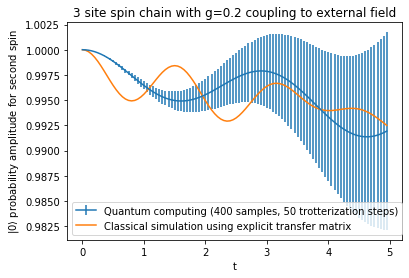

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from pyqcs import State, sample
from transfer_matrix import T_time_slice
from hamiltonian import H

from scipy.linalg import expm

nqbits = 3
g = 0.20
N = 50
t_stop = 5
delta_t = 0.05
qbits = list(range(nqbits))

n_sample = 400
measure = 0b10


results_qc = []
results_np = []
print()
for t in np.arange(0, t_stop, delta_t):
    # QC simulation
    state = State.new_zero_state(nqbits)

    for _ in range(N):
        state = T_time_slice(qbits, t, g, N) * state

    #result = sample(state, measure, n_sample)

    #results_qc.append(result[0] / n_sample)

    amplitude = np.sqrt(np.sum(np.abs(state._qm_state[[False if (i & measure) else True for i in range(2**nqbits)]])**2))
    results_qc.append(amplitude)

    # Simulation using matrices
    np_zero_state = np.zeros(2**nqbits)
    np_zero_state[0] = 1

    itH = np.matrix(-1j * t * H(nqbits, g))
    T = expm(itH)

    np_state = T.dot(np_zero_state)
    amplitude = np.sqrt(np.sum(np.abs(np_state[[False if (i & measure) else True for i in range(2**nqbits)]])**2))
    results_np.append(amplitude)

    print(f"simulating... {int(t/t_stop*100)} %  ", end="\r")
print()
print("done.")

errors_trotter = np.arange(0, t_stop, delta_t)**2 / N**2


h0 = plt.errorbar(np.arange(0, t_stop, delta_t), results_qc, yerr=errors_trotter, label=f"Quantum computing ({n_sample} samples, {N} trotterization steps)")
h1, = plt.plot(np.arange(0, t_stop, delta_t), results_np, label="Classical simulation using explicit transfer matrix")
plt.xlabel("t")
plt.ylabel(r"$|0\rangle$ probability amplitude for second spin")
plt.title(f"{nqbits} site spin chain with g={g} coupling to external field")
plt.legend(handles=[h0, h1])

plt.show()

